In [2]:
from pyopenms import MSExperiment, MzMLFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [6]:
# Function to load mzML file
def load_mzml_file(file_path):
    experiment = MSExperiment()
    MzMLFile().load(file_path, experiment)
    data_loaded = experiment.get_df()
    return experiment, data_loaded

# Load the mzML file
file_path = "C:\\Users\\victo\\VSCode Folder\\UMCG Mass Spec\\3_2_extract_overlap_1.mzML"
experiment, data_loaded = load_mzml_file(file_path)
print(data_loaded.head())
print(data_loaded.describe())
print(data_loaded["mzarray"][10])
print(data_loaded["intarray"][10])

data_loaded.to_csv("data_loaded")


           RT                                            mzarray  \
0  2982.78870  [548.6595438612912, 548.6625912113475, 548.665...   
1  2983.20168  [548.6137949054772, 548.61684187451, 548.61988...   
2  2984.01666  [548.6138211331556, 548.6168681023341, 548.619...   
3  2985.14556  [548.6138475127875, 548.6168944821125, 548.619...   
4  2987.20332  [548.6107912053993, 548.6138381492885, 548.616...   

                                            intarray  
0  [48871.57, 93090.67, 119617.8, 105596.12, 5844...  
1  [59790.492, 110884.73, 140389.9, 125135.02, 77...  
2  [46852.145, 96281.12, 124956.57, 108827.82, 62...  
3  [54953.508, 96425.24, 116641.32, 97879.38, 541...  
4  [60526.164, 89810.484, 101158.25, 86533.97, 50...  
                RT
count   161.000000
mean   3046.764740
std      37.489931
min    2982.788700
25%    3014.804700
50%    3042.811020
75%    3079.571760
max    3112.435440
[548.61071816 548.6137651  548.61681207 548.61985906 548.62290608
 548.62595313 548.629000

# Maximum Intensity Data

In [ ]:
def max_int_data(data):

    # Find the index of the highest intensity in each RT entry (row)
    max_int_indices = [np.argmax(row) for row in data["intarray"]]
    # Extract the corresponding mz values
    max_mz_values = [row[idx] for row, idx in zip(data["mzarray"], max_int_indices)]
    # Extract the highest intensity values
    max_int_values = [row[idx] for row, idx in zip(data["intarray"], max_int_indices)]

    # Extract RT values
    rt_values = data["RT"].tolist()

    # Convert to NumPy arrays
    rt_array = np.array(rt_values)
    mz_array = np.array(max_mz_values)
    int_array = np.array(max_int_values)

    # Print the results
    return rt_array, mz_array, int_array

rt_max_array, mz_max_array, int_max_array = max_int_data(data=data_loaded)

# Convert to Dataframe
max_int_df = pd.DataFrame({"RT": rt_max_array, 
                           "M/Z": mz_max_array, 
                           "INT": int_max_array})

max_int_df.head()

,RT,M/Z,INT
0,2982.78870,548.665639,119617.796875
1,2983.20168,548.619889,140389.906250
2,2984.01666,548.619915,124956.570312
3,2985.14556,548.619941,116641.320312
4,2987.20332,548.616885,101158.250000


# Maximum Intensity Data Scatter Plot

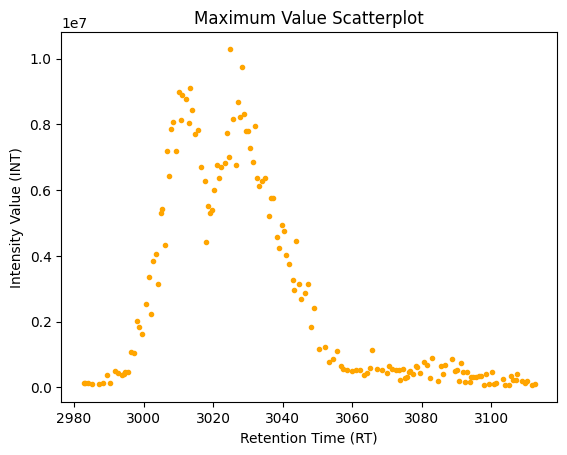

In [ ]:
def max_int_plot(rt_vals, int_vals):
    plt.scatter(x=rt_vals, y=int_vals, c="orange", marker=".")
    plt.title("Maximum Value Scatterplot")
    plt.xlabel("Retention Time (RT)")
    plt.ylabel("Intensity Value (INT)")
    plt.show()

max_int_plot(rt_vals=rt_max_array, int_vals=int_max_array)

# Scipy for Peak Detection

In [ ]:
from scipy.signal import find_peaks

peaks, properties = find_peaks(int_max_array, 
                               height=0.1 * max(int_max_array), 
                               distance=1)

print("Detected Peaks at:", rt_max_array[peaks])


Detected Peaks at: [2996.44644 2998.05858 3001.40106 3003.43434 3005.38872 3006.77148
 3008.48886 3010.03386 3011.01036 3013.34922 3015.6087  3018.4557
 3020.9871  3023.8407  3024.92622 3027.03288 3028.33974 3030.06096
 3032.05884 3034.97814 3037.1661  3039.6486  3043.87224 3047.1345
 3049.06152 3052.03236 3055.44762 3065.7894 ]


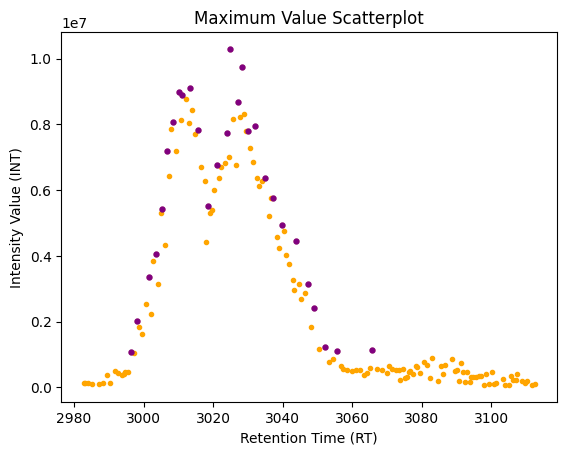

In [ ]:
def maxima_plot(rt_vals, int_vals, maxima):
    plt.scatter(x=rt_vals, y=int_vals, c="orange", marker=".")
    plt.title("Maximum Value Scatterplot")
    plt.xlabel("Retention Time (RT)")
    plt.ylabel("Intensity Value (INT)")
    plt.scatter(rt_vals[maxima], int_vals[maxima], color='purple', s=50, marker='.', label='Detected Maxima')
    plt.show()

maxima_plot(rt_max_array, int_max_array, peaks)